# Deep Artist
___
*Discovering images in noise.*

**Dependencies:**
 - python 3.6.3 | Anaconda, Inc.
 - numpy 1.12.1
 - tensorflow 1.1.0
 - matplotlib 2.1.0
 - PIL
 - scipy

## Import libraries.

In [76]:
%matplotlib notebook
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow.examples.tutorials.mnist import input_data
import _pickle
import matplotlib as mp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import random
from os import listdir

## Display functions for visualization.

In [77]:
def giffify(frame_list, title="A Gif", size=(9, 2.5)):
    """
    frame_list:
        < a list of binary, grayscale or color images represented by numpy arrays
    
    output:
        > an embedded 'gif' made by playing the images in succession
    """
    f = plt.figure(num=title, figsize = size)
    ax = f.gca()
    plt.axis('off')
    image = plt.imshow(frame_list[0])

    def animate_function(frame_index):
        im = frame_list[frame_index]
        image.set_data(im)
        ax.set_title(str(frame_index))
        return image
    
    anim = animation.FuncAnimation(f, animate_function, interval=100, frames=len(frame_list), blit=True)
    return anim

def display_image(imarray, title="An Image", size=(9,1.5)):
    """
    imarray:
        < a binary, grayscale or color image represented by a numpy array
    
    output:
        > displays the image to a matplotlib.pyplot plot
    """
    plt.figure(num=title, figsize = size)
    plt.axis('off')
    im = plt.imshow(imarray)
    plt.show()

## Some ways to create random images.

<IPython.core.display.Javascript object>


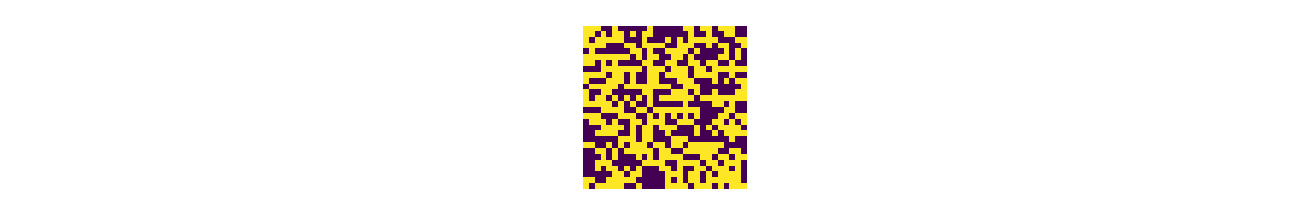

<IPython.core.display.Javascript object>


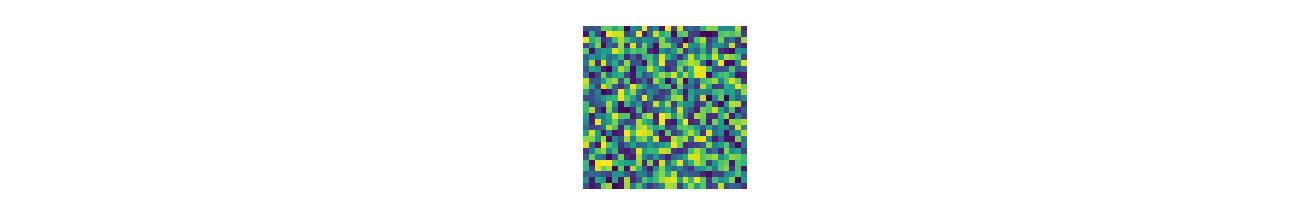

<IPython.core.display.Javascript object>


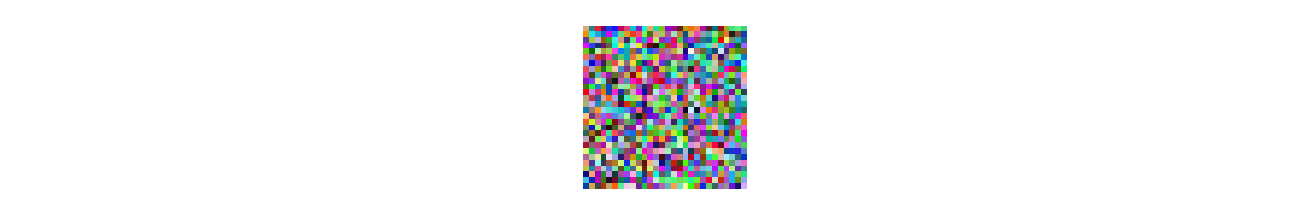

In [78]:
def gen_random_binary(num_images, image_shape):
    return np.random.choice([0, 1], size=(num_images, image_shape[0], image_shape[1])).astype('b')

def gen_random_grayscale(num_images, image_shape):
    return np.random.randint(0, 256, size=(num_images, image_shape[0], image_shape[1]), dtype='u1')

def gen_random_color(num_images, image_shape):
    return np.random.randint(0, 256, size=(num_images, image_shape[0], image_shape[1], 3), dtype='u1')


binary_images = gen_random_binary(10, (28, 28))
grayscale_images = gen_random_grayscale(10, (28, 28))
color_images = gen_random_color(10, (28, 28))

display_image(binary_images[0], title="A Random Binary Image")
display_image(grayscale_images[0], title="A Random Grayscale Image")
display_image(color_images[0], title="A Random Color Image")

## Animating my random color images.

<IPython.core.display.Javascript object>


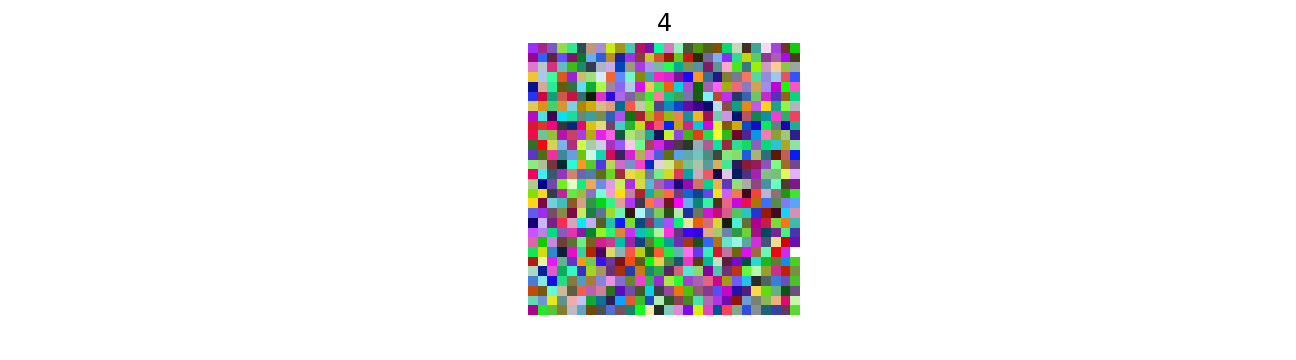

In [79]:
# You might need to run this a couple of times for it to work because switching matplotlib backends is glitchy
giffify(color_images)

## GAN for image generation.

### We will be using pokemon images from https://www.kaggle.com/kvpratama/pokemon-images-dataset

In [80]:
#Load in Pokemon Images

pkmn_img_files = listdir("pokemon")
pkmn_imarrays = []
for file in pkmn_img_files:
    pkmn_imarrays.append(plt.imread("pokemon/" + file))

<IPython.core.display.Javascript object>


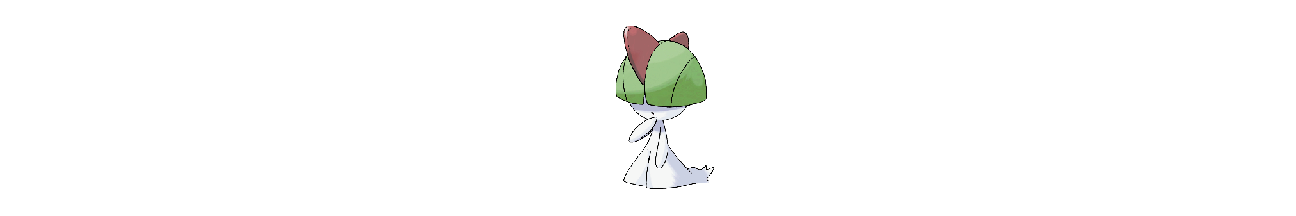

In [115]:
display_image(pkmn_imarrays[round(random.random()*(len(pkmn_img_files) - 1))], "A Pokemon")